In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
data = pd.read_csv(".\coffee_roasting\coffee_roasting.csv")

In [13]:
x = data[["temperature", "duration"]]
y = data["label"]
x = x.values
y = y.values


In [22]:
y = y.reshape(1000,1)
print(x.shape,y.shape)

(1000, 2) (1000, 1)


In [23]:
print(f"Temperature Max, Min pre normalization: {np.max(x[:,0]):0.2f}, {np.min(x[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(x[:,1]):0.2f}, {np.min(x[:,1]):0.2f}")

Temperature Max, Min pre normalization: 90.00, 10.53
Duration    Max, Min pre normalization: 10.00, 0.00


In [24]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(x)
Xn = norm_l(x)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min post normalization: 2.04, -3.26
Duration    Max, Min post normalization: 2.04, -3.03


In [25]:
Xt = np.tile(Xn,(200,1))
Yt = np.tile(y,(200,1))
print(Xt.shape,Yt.shape)

(200000, 2) (200000, 1)


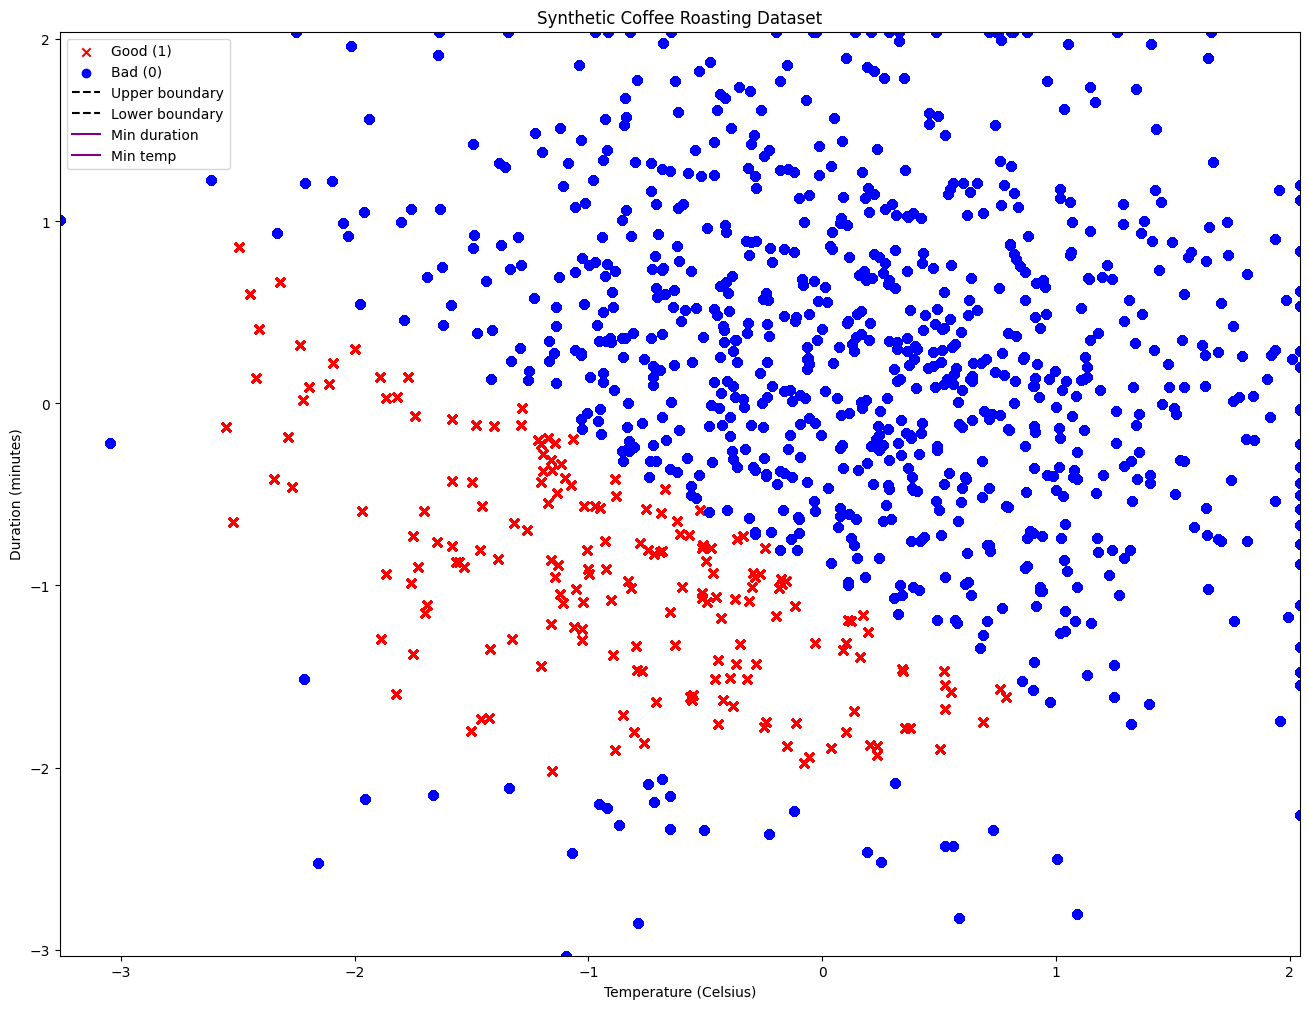

In [28]:
temps = Xt[:, 0]
times = Xt[:, 1]
labels = Yt.ravel()   # flatten (since Yt is tiled to 2D)

# Define thresholds / limits (adjust these to your dataset)
temp_min, temp_max = temps.min(), temps.max()
time_min, time_max = times.min(), times.max()
min_time_threshold = 5   # example
min_temp_threshold = 50  # example

# Plot
plt.figure(figsize=(16,12))
plt.scatter(temps[labels==1], times[labels==1], c='red', marker='x', label="Good (1)")
plt.scatter(temps[labels==0], times[labels==0], c='blue', marker='o', label="Bad (0)")

x = np.linspace(temp_min, temp_max, 200)
plt.plot(x, -0.1*x + 10, 'k--', label="Upper boundary")
plt.plot(x, -0.1*x + 6, 'k--', label="Lower boundary")
plt.axhline(y=min_time_threshold, color='purple', linestyle='-', label="Min duration")
plt.axvline(x=min_temp_threshold, color='purple', linestyle='-', label="Min temp")

plt.xlabel("Temperature (Celsius)")
plt.ylabel("Duration (minutes)")
plt.legend()
plt.title("Synthetic Coffee Roasting Dataset")
plt.ylim(time_min, time_max)
plt.xlim(temp_min, temp_max)
plt.show()

In [31]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.4224515  0.6393057  0.3031925]
 [ 0.9060736 -0.2333278  1.043747 ]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.12914634]
 [-0.8235673 ]
 [-0.07047987]] 
b2(1,): [0.]


In [34]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1646
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1043
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.1004
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0986
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0975
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0967
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0961
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0956
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0951
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0324


In [35]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[14.18966     0.41514522 14.257553  ]
 [19.145504    5.304151   19.23672   ]] 
b1: [15.829375 11.037013 15.952947]
W2:
 [[-31.959044]
 [  9.621122]
 [-33.117737]] 
b2: [-4.6053233]


In [37]:
W1 = np.array([
    [-14.18966  ,   0.41514522 ,14.257553 ],
    [19.145504,    5.304151   ,19.23672 ]] )
b1 = np.array([15.829375, 11.037013 ,15.952947])
W2 = np.array([
    [-31.959044],
    [9.621122],
    [-4.6053233]])
b2 = np.array([15.54])
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])

In [38]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
predictions = 
 [[1.]
 [1.]]
